In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
name_dataset = "rounD-dataset-v1.0"
for i in range(24):
    num_csv = f"0{i}" if len(str(i)) != 2 else str(i)
    path = f"output3/{name_dataset}_2" + num_csv + "concat_dataset.csv"

    df2 = pd.read_csv(path)
    df = pd.concat([df, df2], ignore_index=True)

In [6]:
    if name_dataset == "inD-dataset-v1.0":
        count_csv = 33
    else:
        count_csv = 24

In [7]:
class_ = tuple(set(df['class'].to_list()))

In [8]:
for i in class_:
    if i == 'pedestrian':
        continue
    df2 = df[df['class'] == i]
    df2.dropna(axis=0, inplace=True)
    break

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
df2['label'].value_counts()

slower             278
faster             128
easy-turn-right     86
easy-turn-left       1
Name: label, dtype: int64

In [10]:
column = ['trackLifetime', 'xCenter', 'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity', 
         'xAcceleration', 'yAcceleration', 'lonVelocity','latVelocity', 'lonAcceleration', 'latAcceleration', 
          'label']
column2 = ['1_yVelocity', '1_xVelocity', '1_yAcceleration', '1_xAcceleration', '1_xCenter', '1_yCenter',
           '2_yVelocity', '2_xVelocity', '2_yAcceleration', '2_xAcceleration', '2_xCenter', '2_yCenter',
           '3_yVelocity', '3_xVelocity', '3_yAcceleration', '3_xAcceleration', '3_xCenter', '3_yCenter',
          '3_distance', '2_distance', '1_distance']


In [11]:
column.extend(column2)

In [12]:
df2['label'].value_counts()

slower             278
faster             128
easy-turn-right     86
easy-turn-left       1
Name: label, dtype: int64

In [13]:
print(i)

motorcycle


In [14]:
df2 = df2[column]

In [15]:
df2.at[df2['label']=='turn-right', 'label'] = 'easy-turn-right'

In [16]:
df2.at[df2['label']=='turn-left', 'label'] = 'easy-turn-left'

In [17]:
df2 = df2.drop(df2[df2['label'] == 'easy-turn-left'].index)

In [18]:
df2['label'].value_counts()

slower             278
faster             128
easy-turn-right     86
Name: label, dtype: int64

In [19]:
df2['label'].value_counts()

slower             278
faster             128
easy-turn-right     86
Name: label, dtype: int64

In [20]:
X = df2.drop('label', axis=1)

In [21]:
y = df2['label']

In [22]:
y,class_names = pd.factorize(y)

In [23]:
class_names

Index(['faster', 'slower', 'easy-turn-right'], dtype='object')

In [24]:
len(y), len(X)

(492, 492)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [27]:
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.86
Confusion Matrix: 
 [[ 85  10   1]
 [ 17 169  22]
 [  2   0  63]]
                 precision    recall  f1-score   support

         faster       0.82      0.89      0.85        96
         slower       0.94      0.81      0.87       208
easy-turn-right       0.73      0.97      0.83        65

       accuracy                           0.86       369
      macro avg       0.83      0.89      0.85       369
   weighted avg       0.87      0.86      0.86       369



In [28]:
# Predicting the test results
y_pred=classifier.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.83
Confusion Matrix: 
 [[27  3  2]
 [ 1 57 12]
 [ 1  2 18]]
                 precision    recall  f1-score   support

         faster       0.93      0.84      0.89        32
         slower       0.92      0.81      0.86        70
easy-turn-right       0.56      0.86      0.68        21

       accuracy                           0.83       123
      macro avg       0.80      0.84      0.81       123
   weighted avg       0.86      0.83      0.84       123



In [29]:
column3 = ['trackLifetime', 'xCenter', 'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity', 
         'xAcceleration', 'yAcceleration', 'lonVelocity','latVelocity', 'lonAcceleration', 'latAcceleration', 
          '1_yVelocity', '1_xVelocity', '1_yAcceleration', '1_xAcceleration', '1_xCenter', '1_yCenter',
           '2_yVelocity', '2_xVelocity', '2_yAcceleration', '2_xAcceleration', '2_xCenter', '2_yCenter',
           '3_yVelocity', '3_xVelocity', '3_yAcceleration', '3_xAcceleration', '3_xCenter', '3_yCenter',
          '3_distance', '2_distance', '1_distance']

In [46]:
import graphviz
from sklearn import tree
feature_names = column3
dot_data = tree.export_graphviz(classifier, out_file='tree.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)


In [47]:
g = graphviz.Source(dot_data)

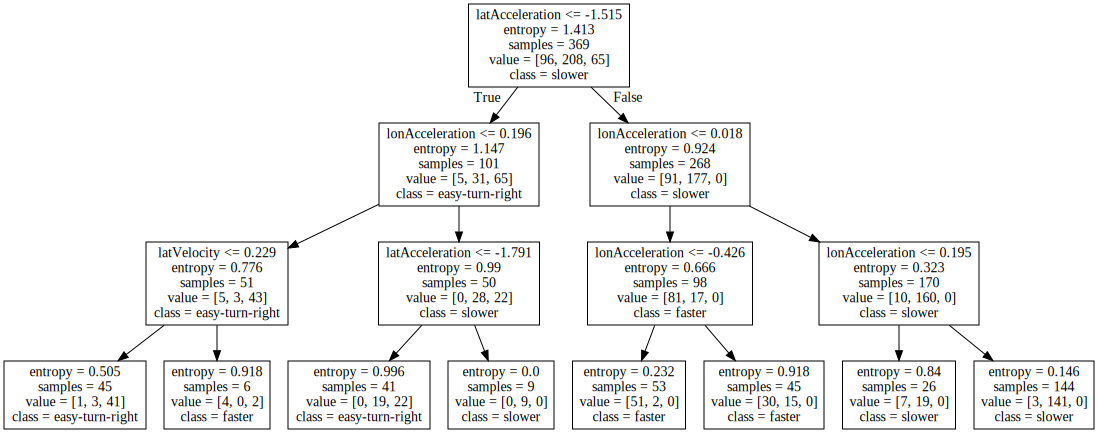

In [48]:
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [33]:
# from joblib import dump, load

In [34]:
# dump(classifier, 'truck_round.joblib')

['truck_round.joblib']

In [35]:
# clf = load('truck_round.joblib')

In [38]:
# clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [44]:
# from sklearn2pmml.pipeline import PMMLPipeline

# pipeline = PMMLPipeline([
# ("classifier", classifier)
# ])

In [41]:
# pipeline.fit(X_train, y_train)

PMMLPipeline(steps=[('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42))])

In [45]:
# from sklearn2pmml import sklearn2pmml

# sklearn2pmml(pipeline, "Decisionmoto2.pmml", with_repr = True)

In [50]:
from pypmml import Model

model = Model.fromFile('Decisionmoto2.pmml')


In [57]:
a = model.predict(X_test)

In [59]:
b = classifier.predict(X_test)

In [63]:
b

array([2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0])

In [66]:
from sklearn2pmml.pipeline import PMMLPipeline

pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42))
])

In [67]:
pipeline.fit(X_train, y_train)

PMMLPipeline(steps=[('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42))])

In [69]:
from sklearn2pmml import sklearn2pmml

sklearn2pmml(pipeline, "Decisionmoto2.pmml", with_repr = True)